In [43]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

Enter the initial prey population:  50
Enter the initial predator population:  20


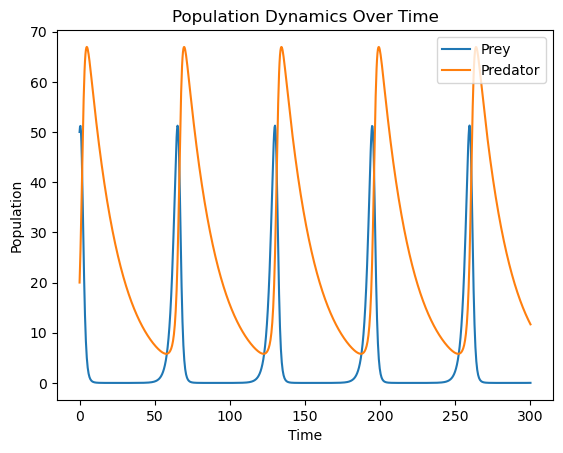

In [47]:
# Model 1a: 1 predator, 1 prey without carrying capacity

# x = population density for prey
# y = population density for predator

# Initializing parameters
a = 0.5 # prey growth rate
b = 0.02 # predator kill rate
c = 0.05 # predator death rate
d = 0.01 # predator growth rate from eating prey

# Defining Lotka-Volterra differential equations
def dSdt(S, t):
    x, y = S
    return [a*x - b*x*y,
            -c*y + d*x*y
           ]

# Initializing population densities
x0 = float(input("Enter the initial prey population: ")) # for example: 50
y0 = float(input("Enter the initial predator population: ")) # for example: 10
S0 = (x0, y0)

t = np.linspace(0, 300, 1000) # time array

# SciPy ODE Int Solver
sol1a = odeint(dSdt, S0, t)

sol1a_x = sol1a[:, 0] # prey population over time
sol1a_y = sol1a[:, 1] # predator population over time

# Runge-Kutta ODE Solver
def odeSolver(S0, dSdt, total_time, time_steps):
    """
    Solves a system of ODEs using the "RK4" Runge-Kutta method

    Parameters:
        S0: (list) representing all initial populations
        dSdt: function representing the system of ODEs
            -takes current populations and time as parameters
            -returns a list describing the LV derivative equations 
        total_time: (float) total time frame for which the ODE is solved in
        time_steps: (int) number of time points over total_time interval

    Returns:
        S: (NumPy array) array of shape (n, time_steps) containing the population values at each time step
            -n = number of variables
        t: (NumPy array) array containing time points corresponding to the time steps from 0 to total_time
    """
    n = len(S0) # number of variables
    S = np.zeros((n, time_steps)) # solution array
    t = np.linspace(0, total_time, time_steps) # time array
    h = t[1] - t[0] # time step size

    # Defining initial values
    for i in range(n):
        S[i, 0] = S0[i]

    # Implementing Runge-Kutta equations
    for i in range(time_steps - 1):
        for j in range(n):
            k1 = dSdt(S[:, i], t)[j]
            k2 = dSdt(S[:, i], t)[j] + (h/2)*k1
            k3 = dSdt(S[:, i], t)[j] + (h/2)*k2
            k4 = dSdt(S[:, i], t)[j] + h*k3

            # Updating solution
            S[j, i+1] = S[j, i] + (h/6)*(k1+2*k2+2*k3+k4)

    return S, t

# Plotting populations over time
plt.plot(t, sol1a_x, label = "Prey")
plt.plot(t, sol1a_y, label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()